# Кластеризация

In [4]:
import warnings #игнорирует ошибки
warnings.filterwarnings("ignore")

In [5]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import numpy as np

In [6]:
# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)


Этот код используется для генерации искусственных данных, называемых "кластеризованными данными" или "блобами". Блобы представляют собой группы точек в n-мерном пространстве, которые имеют общие характеристики и разделены между собой пространственно.

В данном конкретном примере, первые две строки кода создают массивы "blob_centers" и "blob_std", которые задают центры и стандартные отклонения для каждого блоба.

Далее, функция make_blobs из библиотеки scikit-learn используется для генерации 2000 точек данных, которые будут соответствовать этим блобам. Аргументы функции make_blobs, такие как "centers", "cluster_std" и "random_state", используются для настройки создаваемых блобов.

В результате выполнения этого кода, переменная X будет содержать массив из 2000 точек данных, а переменная y будет содержать соответствующие метки кластеров (номера блобов), к которым относятся каждая из точек данных. Эти данные могут быть использованы для обучения алгоритмов машинного обучения, которые выполняют кластеризацию данных или другие задачи, связанные с обнаружением закономерностей в наборах данных.

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

Мы также можем взглянуть на пять центроидов, которые нашел алгоритм: 

In [9]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Можно легко назначить новые экземпляры кластеру, чей центроид находится ближе всего: 

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
kmeans.predict(X_new) 

array([1, 1, 2, 2])

В KMeans классе transform() метод измеряет расстояние от каждого экземпляра до каждого центроида: 

In [11]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

## Методы инициализации центроида 

Если известно, где должны быть центроиды (например, если вы ранее запускали другой алгоритм кластеризации), то можно установить гиперпараметр init в массив NumPy, содержащий список центроидов, и установить n_init его равным 1: 

In [12]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]]) 
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42) 
kmeans.fit(X) 

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

Другое решение состоит в том, чтобы запустить алгоритм несколько раз с разными случайными инициализациями и сохранить лучшее решение. Количество случайных инициализаций контролируется гиперпараметром n_init: по умолчанию оно равно 10, а это значит, что весь описанный ранее алгоритм выполняется 10 раз при вызове fit(), а Scikit-Learn сохраняет лучшее решение. Лучшее решение находится с помощью метрики инерции модели, которая представляет собой сумму квадратов расстояний между экземплярами и их ближайшими центроидами. Метрика доступна через inertia_ переменную экземпляра: 

In [13]:
kmeans.inertia_

211.59853725816834

Метод score() возвращает отрицательную инерцию (отрицательную, потому что score() метод предиктора всегда должен соблюдать правило Scikit-Learn «чем больше, тем лучше»: если предиктор лучше другого, его score() метод должен возвращать большее значение): 

In [14]:
kmeans.score(X)

-211.59853725816836

## Ускоренные k-средние и мини-пакетные k-средние 

Вместо того, чтобы использовать полный набор данных на каждой итерации, алгоритм может использовать мини-пакеты, слегка перемещая центроиды на каждой итерации. Это ускоряет алгоритм (обычно в три-четыре раза) и позволяет кластеризовать огромные наборы данных, которые не помещаются в памяти. Scikit-Learn реализует этот алгоритм в MiniBatchKMeans классе, который вы можете использовать так же, как KMeans класс: 

In [15]:
from sklearn.cluster import MiniBatchKMeans 
 
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42) 
minibatch_kmeans.fit(X) 

MiniBatchKMeans(n_clusters=5, random_state=42)

Еще одно усовершенствование алгоритма k -средних было предложено в статье Чарльза Элкана. Для некоторых больших наборов данных со многими кластерами алгоритм можно ускорить, избегая многих ненужных вычислений расстояния. Элкан добился этого, используя неравенство треугольника (т. е. прямая линия всегда является кратчайшим расстоянием между двумя точками⁠) и отслеживая нижние и верхние границы для расстояний между экземплярами и центроидами. Однако алгоритм Элкана не всегда ускоряет обучение, а иногда может даже значительно замедлить обучение; это зависит от набора данных. Тем не менее, если вы хотите попробовать, установите algorithm="elkan". 

## Нахождение оптимального количества кластеров 

Более точный подход к определению числа кластреров - использование оценки силуэта, которая представляет собой средний коэффициент силуэта по всем экземплярам. Коэффициент силуэта экземпляра равен ( b - a ) / max( a , b ), где a - среднее расстояние до других экземпляров в том же кластере (т. е. среднее расстояние внутри кластера), а b - среднее ближайшее  кластерное расстояние (т. е. среднее расстояние до экземпляров следующего ближайшего кластера, определяемое как тот, который минимизирует b, за исключением собственного кластера экземпляра). Коэффициент силуэта может варьироваться от –1 до +1. Коэффициент, близкий к +1, означает, что экземпляр находится внутри своего кластера и далеко от других кластеров, а коэффициент, близкий к 0, означает, что экземпляр находится близко к границе кластера; наконец, коэффициент, близкий к –1, означает, что экземпляр мог быть отнесен не к тому кластеру. 

Чтобы вычислить оценку силуэта, вы можете использовать функцию Scikit-Learn silhouette_score(), задав ей все экземпляры в наборе данных и присвоенные им метки: 

In [16]:
from sklearn.metrics import silhouette_score 
silhouette_score(X, kmeans.labels_)

0.6555176425728279

## Использование кластеризации для сегментации изображений 

Мы начнем с импорта пакета Pillow (преемник Python Imaging Library, PIL), который затем будем использовать для загрузки изображения ladybug.png:

In [17]:
from pathlib import Path
# создаем новую директорию
IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [18]:
# Этот код загружает изображение "ladybug.png" с помощью модуля urllib 
# и сохраняет его в директорию "images/unsupervised_learning", используя объект IMAGES_PATH, который был создан ранее.
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [19]:
import PIL 
from PIL import Image
image = np.asarray(PIL.Image.open(filepath)) 
image.shape

(533, 800, 3)

Изображение представлено в виде трехмерного массива.  Размер первого измерения — это высота; второе – ширина; а третий — количество цветовых каналов, в данном случае красного, зеленого и синего (RGB).

Следующий код изменяет форму массива, чтобы получить длинный список цветов RGB, а затем кластеризует эти цвета с помощью k -средних с восемью кластерами. Он создает segmented_img массив, содержащий центр ближайшего кластера для каждого пикселя (т. е. средний цвет кластера каждого пикселя), и, наконец, изменяет форму этого массива до исходной формы изображения. В третьей строке используется расширенная индексация NumPy; например, если первые 10 меток kmeans_.labels_равны 1, то первые 10 цветов segmented_img равны kmeans.cluster_centers_[1]: 

In [20]:
X = image.reshape(-1, 3) 
kmeans = KMeans(n_clusters=8, random_state=42).fit(X) 
segmented_img = kmeans.cluster_centers_[kmeans.labels_] 
segmented_img = segmented_img.reshape(image.shape) 

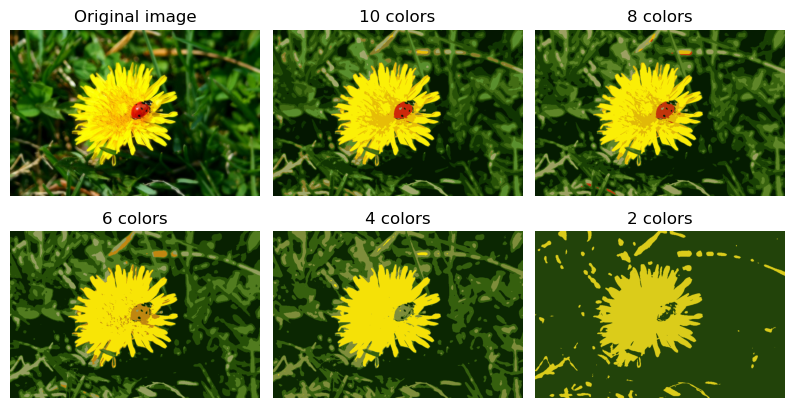

In [21]:
import matplotlib.pyplot as plt

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

Когда вы используете менее восьми кластеров, обратите внимание, что яркий красный цвет божьей коровки не может получить собственный кластер: он смешивается с цветами из окружающей среды. Это связано с тем, что k -means предпочитает кластеры одинакового размера. Божья коровка маленькая — намного меньше, чем остальная часть изображения — поэтому, несмотря на то, что ее цвет яркий, k -means не может выделить ей кластер. 

## Использование кластеризации для частично контролируемого обучения 

В этом разделе мы будем использовать набор данных digits, который представляет собой простой набор данных, подобный MNIST, содержащий 1797 изображений в оттенках серого 8 × 8, представляющих цифры от 0 до 9. Сначала давайте загрузим и разделим набор данных (он уже перетасован):

In [22]:
from sklearn.datasets import load_digits 
 
X_digits, y_digits = load_digits(return_X_y=True) 
X_train, y_train = X_digits[:1400], y_digits[:1400] 
X_test, y_test = X_digits[1400:], y_digits[1400:] 

Сделаем вид, что у нас есть метки только для 50 экземпляров. Чтобы получить базовую производительность, давайте обучим модель логистической регрессии на этих 50 помеченных экземплярах: 

In [23]:
from sklearn.linear_model import LogisticRegression 
 
n_labeled = 50 
log_reg = LogisticRegression(max_iter=10_000) 
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled]) 

LogisticRegression(max_iter=10000)

Затем мы можем измерить точность этой модели на тестовом наборе (обратите внимание, что тестовый набор должен быть помечен): 

In [24]:
log_reg.score(X_test, y_test)

0.7481108312342569

Посмотрим, как мы можем сделать лучше. Во-первых, сгруппируем обучающий набор в 50 кластеров. Затем для каждого кластера найдем изображение, ближайшее к центроиду. Мы будем называть эти изображения репрезентативными изображениями: 

In [25]:
k = 50 
kmeans = KMeans(n_clusters=k, random_state=42) 
X_digits_dist = kmeans.fit_transform(X_train) 
representative_digit_idx = np.argmin(X_digits_dist, axis=0) 
X_representative_digits = X_train[representative_digit_idx] 

50 репрезентативных изображений:

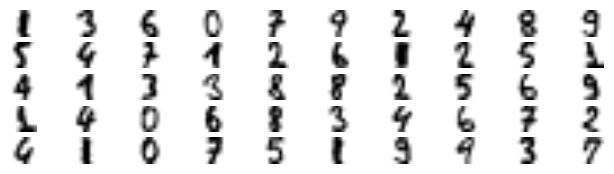

In [26]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [27]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

Теперь у нас есть набор данных с 50 помеченными экземплярами, но вместо того, чтобы быть случайными экземплярами, каждый из них представляет собой репрезентативное изображение своего кластера. Посмотрим, улучшилась ли производительность: 

In [28]:
log_reg = LogisticRegression(max_iter=10_000) 
log_reg.fit(X_representative_digits, y_representative_digits) 
log_reg.score(X_test, y_test)

0.8488664987405542

Но, возможно, мы можем сделать еще один шаг: что, если мы распространим метки на все остальные экземпляры в том же кластере? Это называется распространением меток:

In [29]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64) # Возвращает новый массив заданной формы и типа без инициализации записей.
for i in range(k): 
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i] 

In [30]:
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train_propagated) 
log_reg.score(X_test, y_test)

0.8967254408060453

Можно ли мы добиться еще большего успеха, игнорируя 1% экземпляров, наиболее удаленных от центра своего кластера: это должно устранить некоторые выбросы. Следующий код сначала вычисляет расстояние от каждого экземпляра до его ближайшего центра кластера, а затем для каждого кластера устанавливает 1% наибольших расстояний равным –1. Наконец, он создает набор без этих экземпляров, отмеченных расстоянием -1:

In [31]:
percentile_closest = 99 
 
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] 
for i in range(k): 
    in_cluster = (kmeans.labels_ == i) 
    cluster_dist = X_cluster_dist[in_cluster] 
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) 
    above_cutoff = (X_cluster_dist > cutoff_distance) 
    X_cluster_dist[in_cluster & above_cutoff] = -1 
 
partially_propagated = (X_cluster_dist != -1) 
X_train_partially_propagated = X_train[partially_propagated] 
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [32]:
log_reg = LogisticRegression(max_iter=10_000) 
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated) 
log_reg.score(X_test, y_test)

0.9093198992443325

Scikit-Learn также предлагает два класса, которые могут распространять метки автоматически: LabelSpreading и LabelPropagation в sklearn.semi_supervised пакете. Оба класса создают матрицу сходства между всеми экземплярами и итеративно распространяют метки от помеченных экземпляров к аналогичным немаркированным экземплярам. В том же пакете вызывается совсем другой класс SelfTrainingClassifier: вы даете ему базовый классификатор (например,  RandomForestClassifier) и он обучает его на помеченных экземплярах, а затем использует его для прогнозирования меток для немаркированных образцов. Затем он обновляет обучающий набор метками, в которых он наиболее уверен, и повторяет этот процесс обучения и маркировки до тех пор, пока не сможет больше добавлять метки.

## DBSCAN

Класс DBSCAN в Scikit-Learn прост в использовании, как и следовало ожидать. Давайте проверим это на наборе данных moons:

In [33]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_moons 
 
X, y = make_moons(n_samples=1000, noise=0.05) 
dbscan = DBSCAN(eps=0.2, min_samples=5) 
dbscan.fit(X) 

DBSCAN(eps=0.2)

Для каждого экземпляра алгоритм подсчитывает, сколько экземпляров находится на небольшом расстоянии ε (эпсилон) от него. Эта область называется ε-окрестностью экземпляра.

Метки всех экземпляров теперь доступны в labels_переменной экземпляра: 

In [34]:
dbscan.labels_

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Если некоторые экземпляры имеют индекс кластера, равный –1, что означает, что алгоритм рассматривает их как аномалии. 

Индексы основных экземпляров доступны в core_sample_indices_ переменной instance, а сами основные экземпляры доступны в components_ переменной instance: 

In [35]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [36]:
dbscan.components_

array([[ 0.18157598, -0.0607164 ],
       [-0.03843755,  1.03993619],
       [ 0.34790232,  0.89592587],
       ...,
       [-0.77097652,  0.54123926],
       [-0.82662835,  0.27200991],
       [ 1.296831  , -0.54210532]])

DBSCAN не может предсказать, к какому кластеру принадлежит новый экземпляр. Такое решение было принято потому, что разные алгоритмы классификации могут быть лучше для разных задач, поэтому авторы решили предоставить пользователю возможность выбирать, какой из них использовать. Тем более, что это не сложно реализовать. Например, давайте обучим KNeighborsClassifier: 

In [37]:
from sklearn.neighbors import KNeighborsClassifier 
 
knn = KNeighborsClassifier(n_neighbors=50) 
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_]) 

KNeighborsClassifier(n_neighbors=50)

Теперь, имея несколько новых экземпляров, мы можем предсказать, к каким кластерам они, скорее всего, принадлежат, и даже оценить вероятность для каждого кластера: 

In [38]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]) 
knn.predict(X_new) 

array([1, 0, 1, 0], dtype=int64)

In [39]:
knn.predict_proba(X_new)

array([[0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Метод kneighbors() для KNeighborsClassifier возвращает расстояния и индексы k ближайших соседей в обучающем наборе (две матрицы, каждая с k столбцами): 

In [40]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1) 

## Смешанная модель Гаусса (GMM) 

Давайте сгенерируем тот же набор данных, что и ранее, с тремя эллипсоидами (с тем, с которым у K-Means возникли проблемы):

In [41]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Существует несколько вариантов ГММ. В простейшем варианте, реализованном в GaussianMixture классе, необходимо заранее знать количество k распределений Гаусса:

In [42]:
from sklearn.mixture import GaussianMixture 
 
gm = GaussianMixture(n_components=3, n_init=10) 
gm.fit(X) 

GaussianMixture(n_components=3, n_init=10)

К сожалению, как и k -средние, этот класс может в конечном итоге сходиться к плохим решениям, поэтому его нужно запускать несколько раз, оставляя только лучшее решение. Вот почему мы установили n_init значение 10. Будьте осторожны: по умолчанию n_init установлено значение 1. 

In [43]:
gm.weights_ # веса классов

array([0.20970929, 0.3902064 , 0.40008431])

In [44]:
gm.means_

array([[ 3.39854326,  1.05926051],
       [ 0.0512132 ,  0.07512971],
       [-1.4076241 ,  1.42704927]])

In [45]:
gm.covariances_

array([[[ 1.14901133, -0.03241901],
        [-0.03241901,  0.95484861]],

       [[ 0.68780591,  0.79597839],
        [ 0.79597839,  1.21232694]],

       [[ 0.63480459,  0.72971575],
        [ 0.72971575,  1.16110086]]])

In [46]:
gm.n_iter_ # количество итераций

4

In [47]:
gm.converged_ # сошелся ли алгоритм

True

Модель может легко отнести каждый экземпляр к наиболее вероятному кластеру (жесткая кластеризация) или оценить вероятность того, что он принадлежит к определенному кластеру(мягкая кластеризация). Predict() метод жесткой кластеризации или predict_proba() метод мягкой кластеризации: 

In [48]:
gm.predict(X)

array([1, 1, 2, ..., 0, 0, 0], dtype=int64)

In [49]:
gm.predict_proba(X).round(3)

array([[0.023, 0.977, 0.   ],
       [0.017, 0.983, 0.001],
       [0.   , 0.   , 1.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ]])

Также можно оценить плотность модели в любом заданном месте.Это достигается с помощью score_samples() метода: для каждого заданного экземпляра этот метод оценивает логарифм функции плотности вероятности (PDF) в этом месте. Чем больше баллов, тем выше плотность: 

In [50]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

иногда требуется уменьшить сложность задачи, ограничив количество параметров, которые должен изучить алгоритм. Один из способов сделать это — ограничить диапазон форм и ориентаций, которые могут иметь кластеры. Для этого установите в гиперпараметр covariance_type одно из следующих значений: 

- "spherical" 

Все кластеры должны быть сферическими, но они могут иметь разный диаметр (т.е. разную дисперсию). 

- "diag" 

Кластеры могут принимать любую эллипсоидальную форму любого размера, но оси эллипсоида должны быть параллельны осям координат (т. е. ковариационные матрицы должны быть диагональными). 

- "tied" 

Все кластеры должны иметь одинаковую эллипсоидальную форму, размер и ориентацию (т. е. все кластеры имеют одну и ту же ковариационную матрицу). 

По умолчанию covariance_type равно "full", что означает, что каждый кластер может принимать любую форму, размер и ориентацию.

## Выбор количества кластеров для гауссовых моделей

С k -means вы можете использовать инерцию или оценку силуэта, чтобы выбрать соответствующее количество кластеров. Но для гауссовых моделей использовать эти показатели невозможно, поскольку они ненадежны, когда кластеры не имеют сферической формы или имеют разные размеры. Вместо этого вы можете попытаться найти модель, которая минимизирует теоретический информационный критерий , такой как байесовский информационный критерий (BIC) или информационный критерий Акаике (AIC).

In [51]:
gm.bic(X)

8189.756836104973

In [52]:
gm.aic(X)

8102.531555989935

Визуализируем BIC для различного количества кластеров k: 

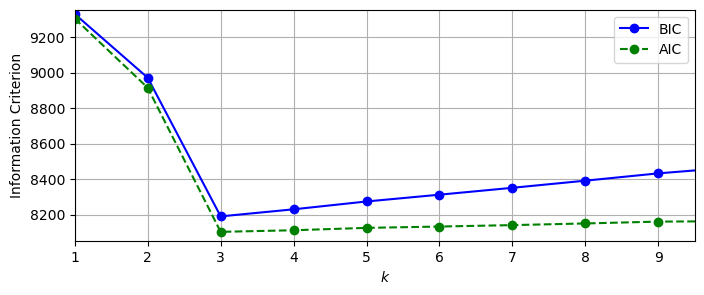

In [53]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])

plt.legend()
plt.grid()

plt.show()

Таким образом, мы видим, что количество кластеров, подобрано верно, минимум достигается именно в этой точке

## Байесовские гауссовские смешанные модели 

Вместо того, чтобы вручную искать оптимальное количество кластеров, можно использовать класс BayesianGaussianMixture, который способен присваивать веса, равные (или близкие) к нулю ненужным кластерам. Например, давайте установим количество кластеров равным 10 и посмотрим, что произойдет: 

In [54]:
from sklearn.mixture import BayesianGaussianMixture 
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42) 
bgm.fit(X) 
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

И последнее замечание о смешанных моделях Гаусса: хотя они отлично работают с кластерами эллипсоидальной формы, они не так хорошо работают с кластерами очень разных форм, например на наборе с лунами он найдет восемь кластеров вместо двух.

# Проверочные вопросы:

- Как бы вы определили кластеризацию? Можете ли вы назвать несколько алгоритмов кластеризации? 

кластеризация - это неконтралируемая задача группировки похожих экземпляров. Популярные алгоритмы кластеризации включают K-Means, DBSCAN, агломеративную кластеризацию, BIRCH, Mean-Shift, аффинное распространение и спектральный анализ.

- Каковы основные области применения алгоритмов кластеризации? 

Анализ данных, сегментация клиентов, рекомендательные системы, поисковые системы, сегментация изображений, частично контролируемое обучение, уменьшение размерности, обнаружение аномалий и обнаружение новшеств.

- Опишите два метода выбора правильного количества кластеров при использовании k -средних.

1. С помощью инерции (средний квадрат расстояния от каждого экземпляра до его ближайшего центроида). Необходимо найти точку на кривой, на которой инерция перестает быстро падать. Обычно это близко к оптимальному количеству кластеров.

2. Другой подход заключается в построении оценки силуэта в зависимости от количества кластеров. Оценка силуэта представляет собой средний коэффициент силуэта по всем экземплярам. Этот коэффициент варьируется от +1 для экземпляров, которые находятся глубоко внутри своего кластера и далеко от других кластеров, до -1 для экземпляров, которые находятся очень близко к другому кластеру. 

- Что такое распространение меток? Зачем вам это реализовывать и как? 

Распространение меток — это метод, заключающийся в копировании некоторых (или всех) меток из экземпляров с метками в аналогичные экземпляры без меток. Это может значительно увеличить количество помеченных экземпляров и, таким образом, позволить контролируемому алгоритму достичь более высокой производительности (это форма полуконтролируемого обучения). Один из подходов заключается в использовании алгоритма кластеризации, такого как K-Means, для всех экземпляров, затем для каждого кластера найдите наиболее распространенную метку или метку наиболее репрезентативного экземпляра (т. е. ближайшего к центроиду) и распространите ее на непомеченные экземпляры в одном кластере.

- Можете ли вы назвать два алгоритма кластеризации, которые можно масштабировать для больших наборов данных? И два, которые ищут области с высокой плотностью? 


K-Means и BIRCH хорошо масштабируются для больших наборов данных. DBSCAN и Mean-Shift ищут области с высокой плотностью.

- Можете ли вы придумать вариант использования, в котором активное обучение было бы полезным? Как бы вы это реализовали? 

Активное обучение полезно, когда у вас много немаркированных экземпляров, но маркировка обходится дорого. В этом случае (что очень часто) вместо случайного выбора экземпляров для маркировки предпочтительнее выполнять активное обучение, когда люди-эксперты взаимодействуют с алгоритмом обучения, предоставляя метки для конкретных экземпляров, когда алгоритм их запрашивает. 

- В чем разница между обнаружением аномалий и обнаружением новизны? 

При обнаружении аномалий алгоритм обучается на наборе данных, который может содержать выбросы, и цель обычно состоит в том, чтобы идентифицировать эти выбросы (в обучающем наборе), а также выбросы среди новых экземпляров. При обнаружении новинок алгоритм обучается на наборе данных, который считается «чистым», и цель состоит в том, чтобы обнаруживать новшества строго среди новых экземпляров. Некоторые алгоритмы лучше всего подходят для обнаружения аномалий (например, Isolation Forest), в то время как другие лучше подходят для обнаружения новшеств (например, SVM одного класса).

- Что такое гауссовская смесь? Для каких задач вы можете использовать её? 

Модель используют, если предполагается, что данные сгруппированы в конечное число кластеров, каждый из которых имеет эллипсоидальную форму (при этом кластеры могут иметь разные эллипсоидальные формы, размеры, ориентацию и плотность), и мы не знаем, к кокому кластеру каждый экземпляр принадлежит. Эта модель полезна для оценки плотности, кластеризации и обнаружения аномалий.

- Можете ли вы назвать два метода нахождения правильного количества кластеров при использовании смешанной модели Гаусса? 

Один из способов найти правильное количество кластеров при использовании смешанной модели Гаусса состоит в том, чтобы построить байесовский информационный критерий (BIC) или информационный критерий Акаике (AIC) как функцию количества кластеров, а затем выбрать количество кластеров, которое минимизирует BIC или AIC. Другой метод заключается в использовании смешанной байесовской гауссовской модели, которая автоматически выбирает количество кластеров.

# Практическая часть:

## Задача №1:

Классический набор данных лиц Olivetti содержит 400 изображений лиц в градациях серого размером 64 × 64 пикселя. Каждое изображение выравнивается до одномерного вектора размером 4096. Было сфотографировано сорок разных людей (каждого по 10 раз), и обычная задача — обучить модель, которая может предсказывать, какой человек изображен на каждом снимке. Загрузите набор данных с помощью sklearn.datasets.fetch_olivetti_faces()функции, затем разделите его на обучающий набор, проверочный набор и тестовый набор (обратите внимание, что набор данных уже масштабирован от 0 до 1). Поскольку набор данных довольно мал, вы, вероятно, захотите использовать стратифицированную выборку, чтобы обеспечить одинаковое количество изображений на человека в каждом наборе. Затем сгруппируйте изображения, используя k-means, и убедитесь, что у вас есть достаточное количество кластеров (используя один из методов, обсуждаемых в этой главе). Визуализируйте кластеры: видите ли вы похожие лица в каждом кластере? 

In [55]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [59]:
print(olivetti.data.shape)

(400, 4096)


Количество уникальных идентификаторов (означает, что в датасете представлено изображение лица 40 уникальных людей):

In [63]:
print(len(set(olivetti.target)))

40


In [62]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

# Алгоритм StratifiedShuffleSplit работает следующим образом: он случайным образом перемешивает данные и затем разбивает их на заданное количество частей (splits).
#  При этом он гарантирует, что в каждой из частей будут присутствовать данные всех классов в тех же пропорциях, что и в исходном наборе данных. 
# Это позволяет более корректно оценить качество модели на тестовой выборке.

In [72]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42) # отобрали 40 экземпляров, можно изменить код test_size=40
train_valid_index, test_index = next(splitter.split(olivetti.data, olivetti.target)) 

X_train_valid, X_test = olivetti.data[train_valid_index], olivetti.data[test_index]
y_train_valid, y_test = olivetti.target[train_valid_index], olivetti.target[test_index]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2222, random_state=42) # отобрали 80 экземпляров, можно изменить код test_size=80
train_index, valid_index = next(splitter.split(X_train_valid, y_train_valid))

X_train, X_valid = X_train_valid[train_index], X_train_valid[valid_index]
y_train, y_valid = y_train_valid[train_index], y_train_valid[valid_index]

In [73]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


Чтобы ускорить процесс, мы уменьшим размерность данных с помощью PCA (то есть выделения наиболее значимых признаков измногомерного набора данных):

In [74]:
from sklearn.decomposition import PCA

pca = PCA(0.99) # сохраняям 99% дисперсии данных
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_ # возвращает количество главных компонент, которое было сохранено для достижения 99% дисперсии данных. 

200

После выполнения этого кода мы получим список объектов KMeans, каждый из которых обучен на разном количестве кластеров. Это позволит нам далее проанализировать качество кластеризации для каждого значения k и выбрать оптимальное количество кластеров для нашей задачи:

In [77]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5) #  задаем диапазон значений k от 5 до 150 с шагом в 5
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

Для выбора оптимального числа кластеров используем коэффициент силуэта silhouette_score:

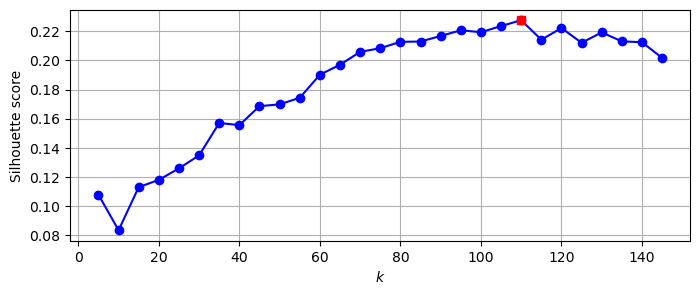

In [78]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
# cоздаем список silhouette_scores, содержащий коэффициенты силуэта для каждого значения k из k_range, которые были обучены в предыдущем коде

best_index = np.argmax(silhouette_scores) # находим индекс элемента в списке silhouette_scores, 
                                          # который соответствует наилучшему коэффициенту силуэта, с помощью функции np.argmax(). 
best_k = k_range[best_index]
best_score = silhouette_scores[best_index] # находим оптимальное значение k и наилучший коэффициент силуэта best_score, используя индекс best_index.

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [79]:
best_k

110

Можно было ожидать, что кластеров будет 40, а не 110, поскольку на фотографиях 40 разных людей. Однако один и тот же человек может выглядеть совершенно по-разному на разных изображениях.

Теперь посмотрим, как будет выглядить график инерции (метод локтя) при значении k=110: 

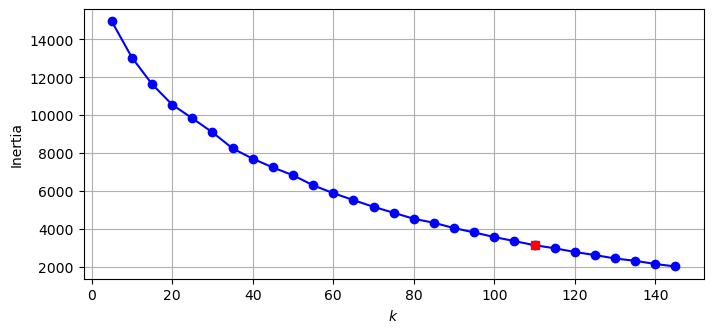

In [80]:
inertias = [model.inertia_ for model in kmeans_per_k] # создаем список inertias, содержащий значения инерции для каждого 
                                                      # значения k из k_range, которые были обучены в предыдущем коде
best_inertia = inertias[best_index] # затем используем индекс best_index, 
# который был найден при помощи np.argmax(silhouette_scores), чтобы найти значение inertia_ для оптимального числа кластеров.

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [82]:
best_model = kmeans_per_k[best_index]

Визуализируем кластеры:

In [91]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
        
    plt.show()

Распечатаем первые 10 кластеров:

Cluster 0


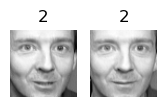

Cluster 1


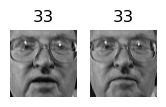

Cluster 2


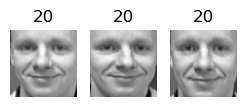

Cluster 3


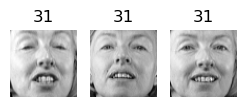

Cluster 4


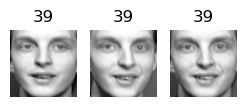

Cluster 5


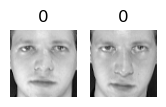

Cluster 6


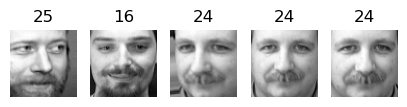

Cluster 7


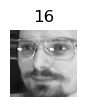

Cluster 8


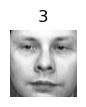

Cluster 9


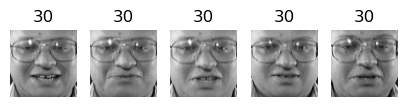

In [92]:
count = 0
for cluster_id in np.unique(best_model.labels_):
    if count == 10:
        break
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)
    count += 1


6 кластер содержит несколько ошибочных фотографий, так же мы видим, что есть кластеры, которые содержат по одой фотографии. Такой способ кластеризации изображений может быть слишком неточным, чтобы быть полезным непосредственно при обучении модели, но он может быть чрезвычайно полезен при маркировке изображений в новом наборе данных: обычно это значительно ускоряет маркировку.

## Задача №2

Продолжая работать с набором данных лиц, научите классификатор предсказывать, какой человек изображен на каждом изображении, и оцените его в проверочном наборе. Затем используйте k-means в качестве инструмента уменьшения размерности и обучите классификатор на сокращенном наборе. Найдите количество кластеров, позволяющее классификатору добиться наилучшей производительности: какой производительности вы можете достичь? Что, если вы добавите функции из сокращенного набора к исходным функциям (опять же, ища наилучшее количество кластеров)? 

In [93]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9

In [94]:
# используем лучшую модель из предыдущего задания для уменьшения размерности данных:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [97]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7375

Оценка ухудшилась. Посмотрим, может ее можно улучшить изменив количество кластеров:

In [99]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(KMeans(n_clusters=n_clusters, random_state=42),
                             RandomForestClassifier(n_estimators=150, random_state=42))

    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.45
10 0.4625
15 0.5375
20 0.6125
25 0.675
30 0.675
35 0.7
40 0.6625
45 0.675
50 0.7
55 0.675
60 0.7
65 0.725
70 0.6875
75 0.6875
80 0.7375
85 0.75
90 0.7125
95 0.725
100 0.7125
105 0.725
110 0.7375
115 0.7625
120 0.75
125 0.7
130 0.7625
135 0.75
140 0.75
145 0.75


Что ж, даже настраивая количество кластеров, мы никогда не достигаем точности выше 80%. Похоже, что расстояния до центроидов скоплений не так информативны, как исходные изображения.

Следующий код горизонтально объединяет две матрицы признаков X_train_pca и X_train_reduced вместе, используя метод np.c_, который объединяет матрицы путем конкатенации по второй оси. Полученная матрица X_train_extended содержит столько же строк, сколько исходная матрица X_train_pca, но с большим количеством столбцов, что позволяет использовать больше признаков для обучения модели:

In [101]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [102]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8

Это немного лучше, но все же хуже, чем без функций кластера. В этом случае кластеры бесполезны для непосредственного обучения классификатора (но они все же могут помочь при маркировке новых обучающих экземпляров).

## Задача №3

Обучите смешанную модель Гаусса. Чтобы ускорить алгоритм, вам, вероятно, следует уменьшить размерность набора данных (например, использовать PCA, сохраняя 99% дисперсии). Используйте модель, чтобы сгенерировать несколько новых лиц (используя sample() метод) и визуализировать их (если вы использовали PCA, вам нужно будет использовать его inverse_transform() метод). Попробуйте изменить некоторые изображения (например, повернуть, перевернуть, затемнить) и посмотреть, сможет ли модель обнаружить аномалии (т. е. сравнить результат метода score_samples() для нормальных изображений и для аномалий). 

In [103]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

Cгенирируем 20 новых лиц:

In [105]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces) 
gen_faces = pca.inverse_transform(gen_faces_reduced) # декодируем сжатые представления в изображения лиц.

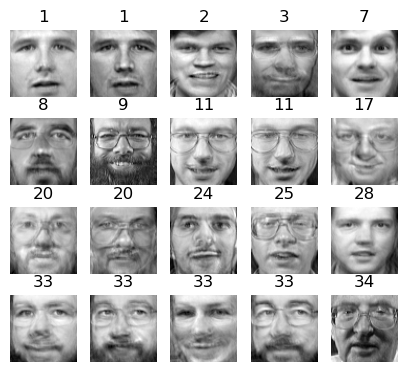

In [106]:
plot_faces(gen_faces, y_gen_faces)

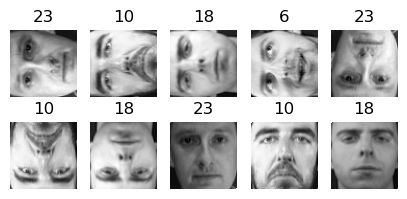

In [107]:
# Первый блок создает изображения, повернутые на 90 градусов, с помощью транспонирования и изменения формы массива.
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# Второй блок создает изображения, отраженные по горизонтали, путем изменения порядка пикселей.
n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# Третий блок создает изображения, затемненные по центру, путем уменьшения значения пикселей в центре изображения.
n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

# Затем все три блока объединяются в один массив с помощью np.r_, 
# а соответствующие метки классов сохраняются в y_bad. Наконец, функция plot_faces 
# используется для отображения всех измененных изображений.
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

Применим метод PCA, обученный ранее, к набору данных X_bad_faces:

In [108]:
X_bad_faces_pca = pca.transform(X_bad_faces) 

Score_samples() вычисляет логарифмы плотности вероятности для каждой из наблюдений в X_bad_faces_pca в модели gm. Значения ближе к 0 указывают на более правдоподобные наблюдения в соответствии с моделью. Значения, которые значительно меньше 0, могут указывать на то, что наблюдения имеют низкую вероятность с точки зрения модели, и могут рассматриваться как "аномальные".

In [109]:
gm.score_samples(X_bad_faces_pca)

array([-5.12919781e+07, -3.15310587e+07, -2.95897871e+07, -4.73996319e+07,
       -2.57863663e+07, -5.03268030e+07, -5.07725495e+07, -1.10080838e+08,
       -8.83094591e+07, -8.80759128e+07])

Все плохие лица считаются крайне маловероятными в модели Gaussian Mixture. Сравните это с оценками некоторых обучающих примеров:

In [110]:
gm.score_samples(X_train_pca[:10])

array([1168.94476755, 1118.66466167, 1118.66465971, 1129.35918326,
       1087.53034218, 1146.18455747, 1146.03684254, 1082.49224557,
       1168.65018156, 1129.35918197])

Таким образом, модель легко вычисляет аномалии.

## Задача №4

Некоторые методы уменьшения размерности также могут использоваться для обнаружения аномалий. Например, возьмите набор данных лиц Olivetti и уменьшите его с помощью PCA, сохранив 99% дисперсии. Затем вычислите ошибку реконструкции для каждого изображения. Затем возьмите несколько измененных изображений, которые вы создали в предыдущем упражнении, и посмотрите на их ошибку реконструкции: обратите внимание, насколько она больше. Если вы начертите реконструированное изображение, вы поймете, почему: оно пытается реконструировать нормальное лицо. 

Мы уже уменьшали набор данных с помощью PCA ранее:

In [111]:
X_train_pca.round(2)

array([[ 2.21,  8.18, -3.16, ...,  0.11,  0.11, -0.12],
       [-2.88, -5.85, -3.11, ..., -0.19, -0.08,  0.1 ],
       [-3.72, -3.72, -1.61, ...,  0.11,  0.07,  0.02],
       ...,
       [ 0.03, -1.49,  2.31, ...,  0.13, -0.06,  0.01],
       [-2.04, -2.06,  1.71, ..., -0.12, -0.05,  0.03],
       [ 4.33,  0.78, -1.69, ...,  0.14, -0.19, -0.03]], dtype=float32)

Напишем функцию, которая принимает обученную модель PCA (pca) и набор данных (X) в качестве входных данных и вычисляет среднеквадратичную ошибку (MSE) реконструкции каждой точки данных при X использовании модели PCA.

In [112]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca) # inverse_transform метод модели PCA, который восстанавливает исходные точки данных из их низкоразмерных представлений.
    mse = np.square(X_reconstructed - X).mean(axis=-1) # Разница между исходными точками данных и их реконструкциями в исходном пространстве 
    # вычисляется с использованием поэлементной квадратичной разницы между двумя массивами X_reconstructed и X
    return mse

In [113]:
reconstruction_errors(pca, X_train).mean()

0.00018892145

In [114]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0062149013

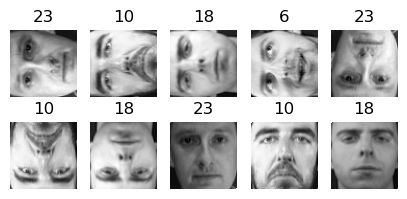

In [115]:
plot_faces(X_bad_faces, y_bad)

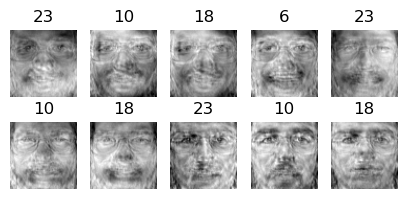

In [116]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)

Действительно, восстановленное лицо очень плохого качества, что говорит об аномалии (лица были искажены).